Get the spiketrain

In [2]:
import numpy as np
import pickle
import math


#which rat?
dataset = np.load('python_format/moserlab_waaga_25843_2019-09-13_22-54-22_v1.npy', allow_pickle=True)
data = dataset.item()
#print(data)


{'name': 'moserlab_waaga_25843_2019-09-13_22-54-22_v1', 'description': 'Spike and tracking data of 258 grid cells in openfield darkness (task 1), and light (task 2) recordings in a 175cm Ø circular arena, from moser lab rat 25843.', 'task': {0: {'name': 'open_field_darkness_1', 'spike_timestamp': array([ 718.00101451,  718.00424786,  718.0221146 , ..., 4289.98699632,
       4289.99682969, 4289.99783333]), 'spike_cluster_id': array([2460., 2460., 2757., ..., 2880., 2774.,  933.]), 'tracking': {'t': array([ 718.00769667,  718.0159553 ,  718.02435012, ..., 4289.9827895 ,
       4289.99116373, 4289.99947475]), 'x': array([-62.4298172 , -62.41214752, -62.3555069 , ...,  24.84041977,
        24.8414135 ,  24.84239197]), 'y': array([14.63610554, 14.77929497, 14.9138422 , ..., 41.02522278,
       41.02521896, 41.02688599]), 'z': array([10.83677006, 10.90196609, 11.0026207 , ...,  8.60437202,
        8.6036396 ,  8.61313534]), 'hd': array([1.46529142, 1.46774578, 1.4574432 , ..., 0.7526902 , 0.

In [3]:
Spike_times = data['task'][1]['spike_timestamp']  # times of very light spike
Spike_units = data['task'][1]['spike_cluster_id'] # corresponding cell that fired
Time = data['task'][1]['tracking']['t']

Time =  Time - Time[0]

Units = np.unique(Spike_units) # distinct cells that spike
N = len(Units) # number of cells

dt = np.mean(Time[2:len(Time)-1] - Time[1:len(Time)-2]) # average interval between time points
Tp = len(Time) # number of time points

ST = np.zeros((N,Tp)) # contains number of spikes for each neuron for each time bin
print(ST.shape)
for n in range(N): # for every neuron
    u = np.where(Spike_units==Units[n]) #indexes of spikes 
    st = Spike_times[u] #times of spikes for neuron n
    st = st - st[0] #this I added because the first spikes don't begin for so long that it doesn't fit in shape Tp

    D = st//dt # D is the list of time bins for each spike of neuron n
    # in matlab they set all bins labeled 0 to bin 1, not sure if necessary, only for spikes occuring before one full dt has passed
    
    for k in range(len(D)):
        x = int(D[k])
        
        ST[n][x]=ST[n][x]+1


print(ST)

(258, 436879)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


Find Theta

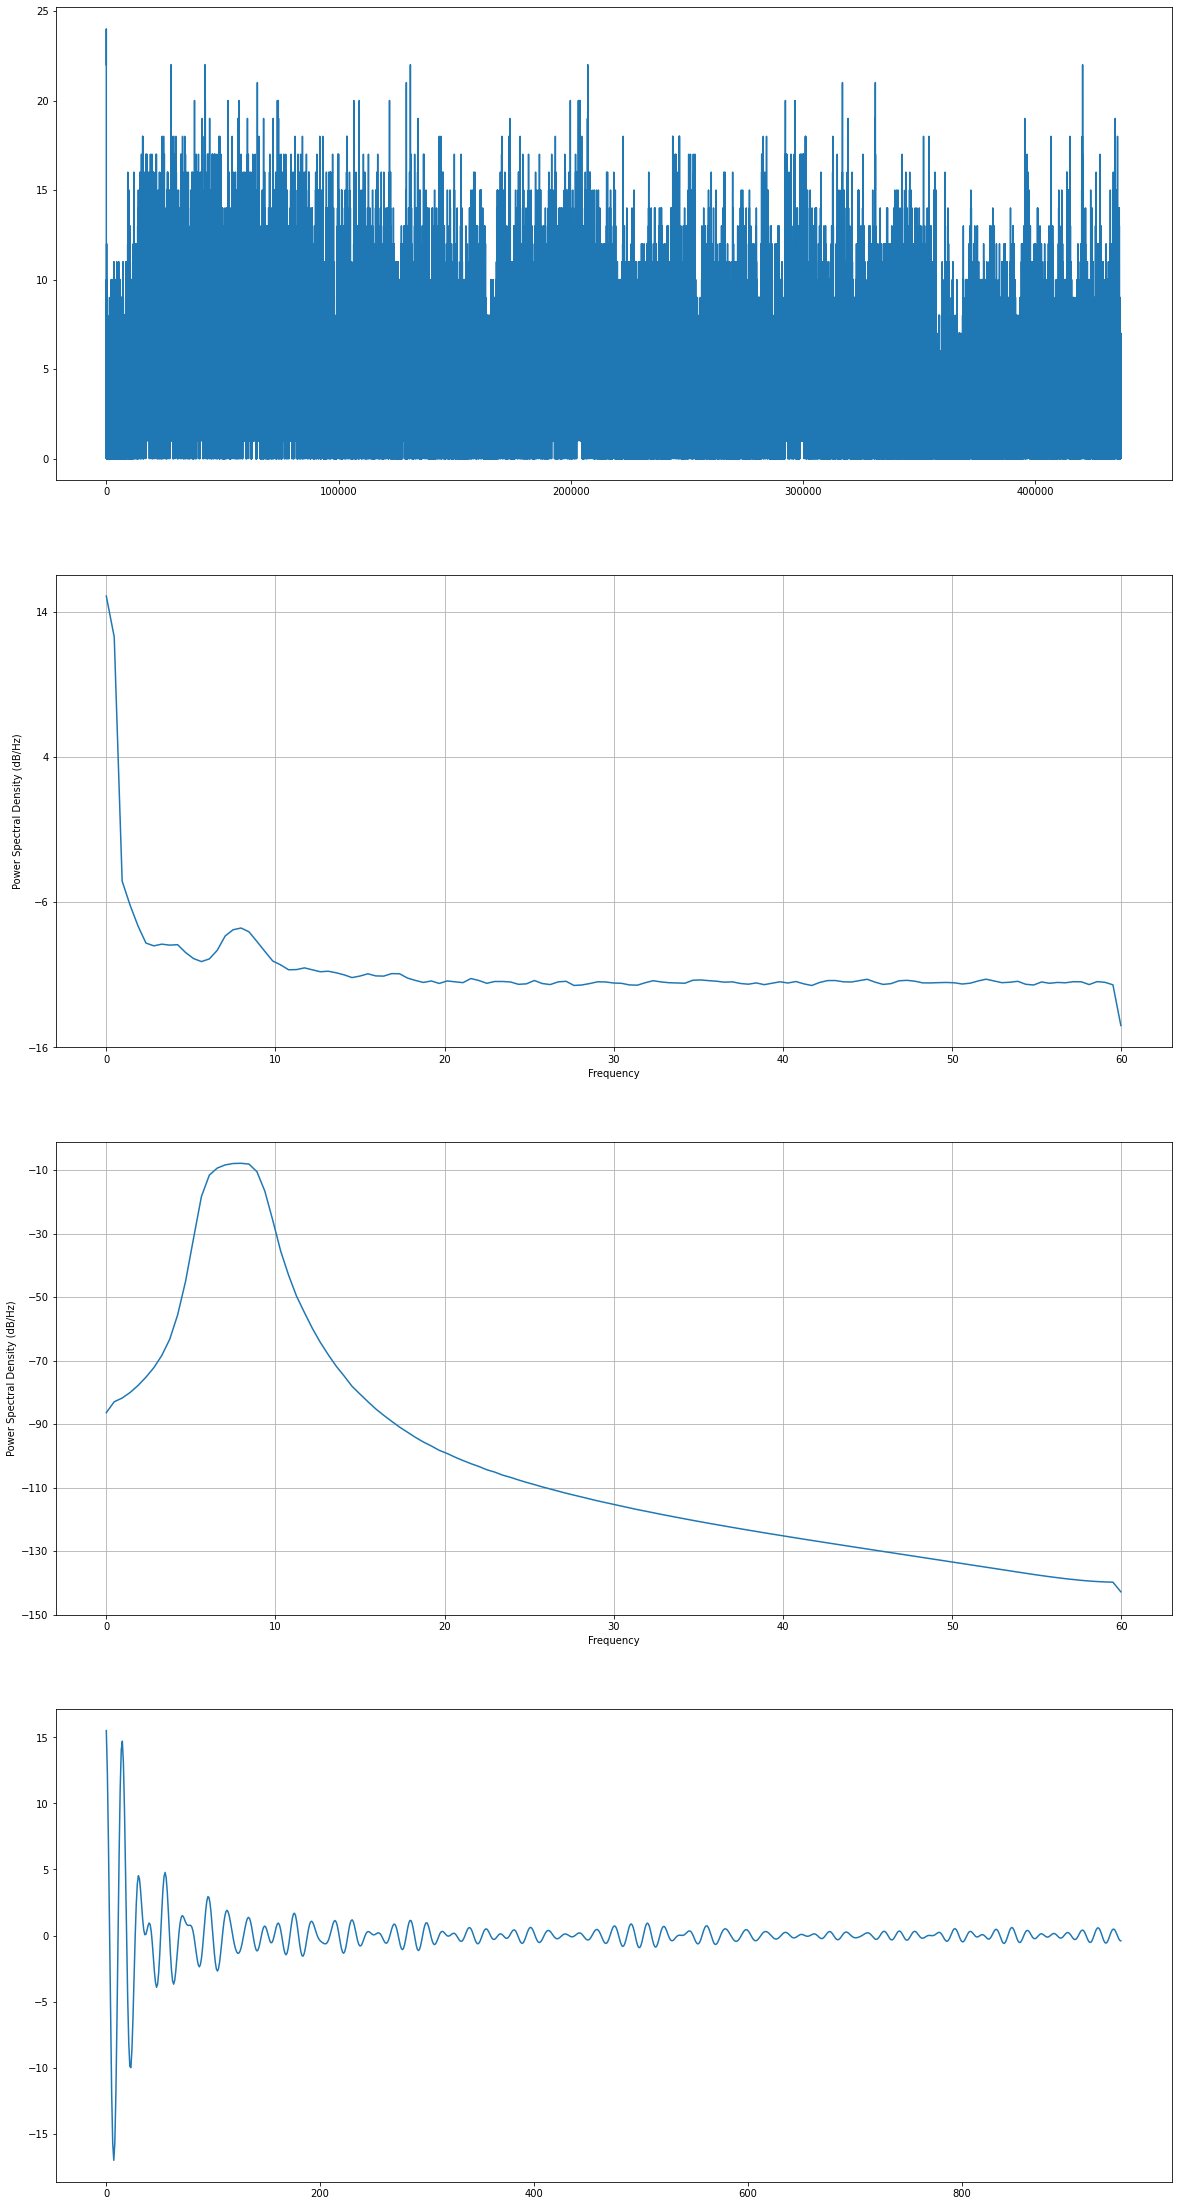

In [24]:
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

fs = 1/dt

all = np.sum(ST,0)

filtered = butter_bandpass_filter(all, 6, 9, fs, order=6)

plt.figure(figsize=(20,40))
plt.subplot(4,1,1)
plt.plot(all[2:])
plt.subplot(4,1,2)
plt.psd(all, Fs=fs)
plt.subplot(4,1,3)
plt.psd(filtered, Fs=fs)
plt.subplot(4,1,4)
plt.plot(filtered[50:1000])


Get the tuning curves

In [5]:
#separate into bins. For a moving window of about 30 time bins, find the high, low and zero points on the theta
#first classify all zeroes. Ask about separate bins for falling and rising zeroes

Get the noise correlation between eevery two cells, in one module or between